In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("C:\\Users\\abhay\\Downloads\\diabetes.csv")
print("Shape : ",df.shape)
df.head()

Shape :  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'correlation matrix of squared correlations \n\n\n\n')

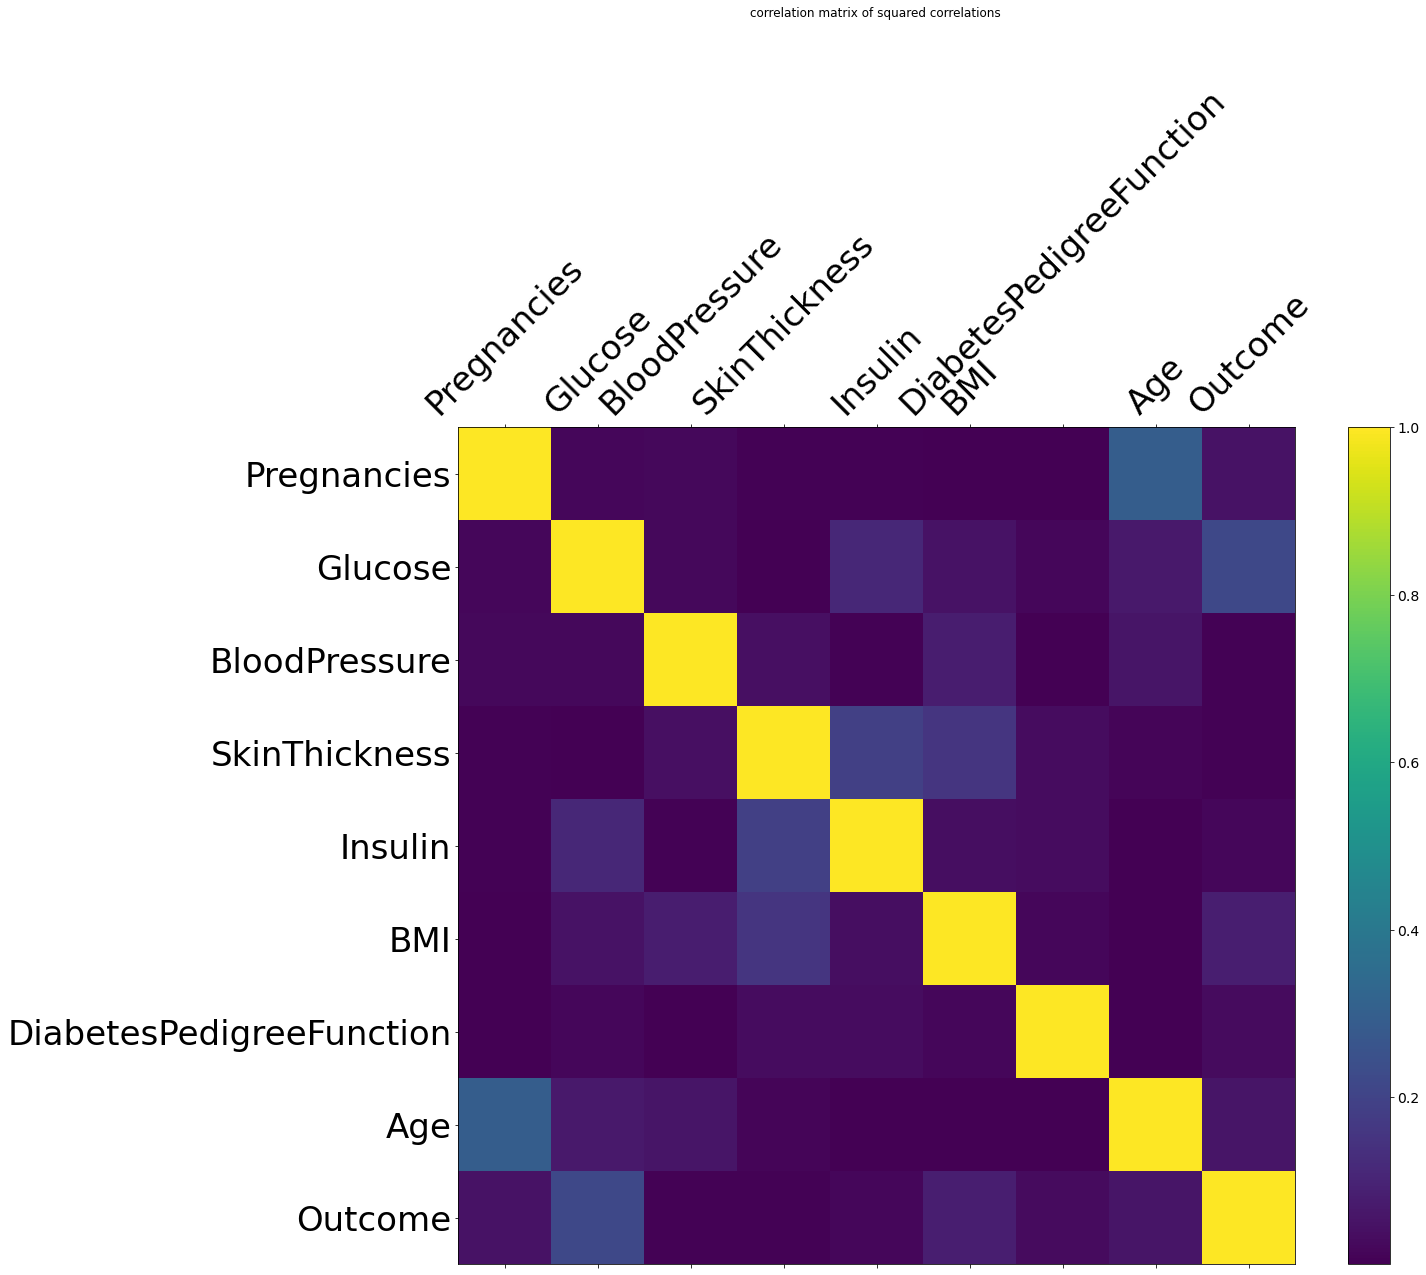

In [6]:
fig = plt.figure(figsize = (19,15))
plt.matshow(df.corr()**2,fignum = fig.number)
plt.xticks(range(df.shape[1]),df.columns,fontsize = 34,rotation = 45)
plt.yticks(range(df.shape[1]),df.columns,fontsize = 34)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title("correlation matrix of squared correlations \n\n\n\n")

In [6]:
# 1->diabetic
# 0->Healthy

print(df['Outcome'].value_counts())
fig = plt.figure(figsize = (10,6))

0    500
1    268
Name: Outcome, dtype: int64


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Outcome', ylabel='count'>

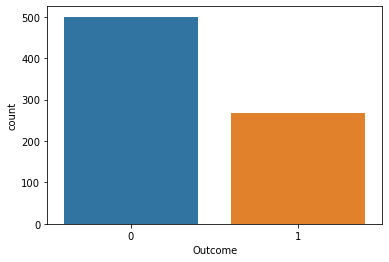

In [7]:
sns.countplot(x = "Outcome",data = df)

In [8]:
x = df.drop(["BloodPressure","SkinThickness"],axis = 1)
y = df.iloc[:,-1]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [10]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [11]:
#knn
#Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
kn_classifier = KNeighborsClassifier(n_neighbors=5,p=2)
kn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
kn_y_pred = kn_classifier.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
cn_kn = confusion_matrix(y_test,kn_y_pred)
cn_kn

array([[106,   1],
       [  0,  47]], dtype=int64)

In [14]:
print("accuracy : ", sum(kn_y_pred == y_test)/len(kn_y_pred))

accuracy :  0.9935064935064936


In [15]:
#svm

svc_classifier  = SVC(kernel="linear")
svc_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [16]:
svc_y_pred = svc_classifier.predict(x_test)

In [17]:
svc_cn = confusion_matrix(y_test,svc_y_pred)
svc_cn

array([[107,   0],
       [  0,  47]], dtype=int64)

In [18]:
print("Accuracy : ",sum(svc_y_pred == y_test)/len(kn_y_pred))

Accuracy :  1.0


In [19]:
#naive_bias
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [20]:
nb_y_pred = nb_classifier.predict(x_test)

In [21]:
nb_cn = confusion_matrix(nb_y_pred,y_test)
nb_cn

array([[107,   0],
       [  0,  47]], dtype=int64)

In [22]:
print("Accuracy : ",sum(svc_y_pred == y_test)/len(kn_y_pred))

Accuracy :  1.0
